<h1><center> DATS6450 Final Project Sign-Language MNIST Problem</center></h1>
<center> Group 8</center>
<center> Present by: Junhe Zhang</center>
<center> Due: 11/30</center>


# Introduction of Sign-Language MNIST Problem (American Sign Language)

American Sign Language (ASL) is a complete natural language that has the similar linguistic properties as spoken language. ASL use hand movements combined with special gestures and face expressions to deliver their thought. ASL is the primary language of many North Americans who have speaking or hearing issues. The training and testing datasets which provided by Kaggle.com contains approximately 35,000 data points about 25 different gestures which represent alphabetic letters from A-Z without letter J and Z because of gesture motions issue. The datasets come with .CSV format which have 785 columns. The first column indicates the corresponding alphabetic letters label (from 0-25) and the rest of 784 columns represent 28x28 image pixels.  

<div style="text-align:center"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6X3YuMamMSOulZ8lXSjmR6dXPB4jW1XKE3Q&usqp=CAU" /></div>

# Project Objective

The goal of this project is to utilize the GPU computational power, which obtained from AWS GPU instance, to process large dataset on deep neuron network model. In order to construct an accurate NN-model to correctly classify new coming ASL data points. This model could be used to create large YOLO format dataset for future real-time Object detection purpose study.

# Import necessary external library

In [53]:
# import useful libraries

import numpy as np 
import pandas as pd # reading dataset into dataframe

# Input data files are available in the "../dataset/" directory.
# Display all sub-folder under current working directory, sign-language-MNIST

import os
for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/ubuntu/sign-language-MNIST/sign_language_MNIST.ipynb
/home/ubuntu/sign-language-MNIST/dataset/sign_mnist_train.csv
/home/ubuntu/sign-language-MNIST/dataset/american_sign_language.PNG
/home/ubuntu/sign-language-MNIST/dataset/sign_mnist_test.csv
/home/ubuntu/sign-language-MNIST/dataset/amer_sign2.png
/home/ubuntu/sign-language-MNIST/dataset/amer_sign3.png
/home/ubuntu/sign-language-MNIST/dataset/sign_mnist_test/sign_mnist_test.csv
/home/ubuntu/sign-language-MNIST/dataset/sign_mnist_train/sign_mnist_train.csv
/home/ubuntu/sign-language-MNIST/.ipynb_checkpoints/sign_language_MNIST-checkpoint.ipynb


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

## Loading Data into Data Frame

In [55]:
train_df = pd.read_csv("./dataset/sign_mnist_train.csv")

In [56]:
# show 5 data points from train
train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [57]:
test_df = pd.read_csv("./dataset/sign_mnist_test.csv")

In [58]:
# show 5 data points from test
test_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


## Exploratory Data Analysis and Preprocessing

### Check for balance between Labels

It is very important to know whether the training dataset is balanced or not between each classification label. An imbalance dataset would cause the NN-model to study the features that only belong to the most common data points (gestures in our case), and cause the evaluation process less reliable. To solve this problem, image augmentation technics must be taken placed.

Text(0.5, 1.0, 'Count VS Label')

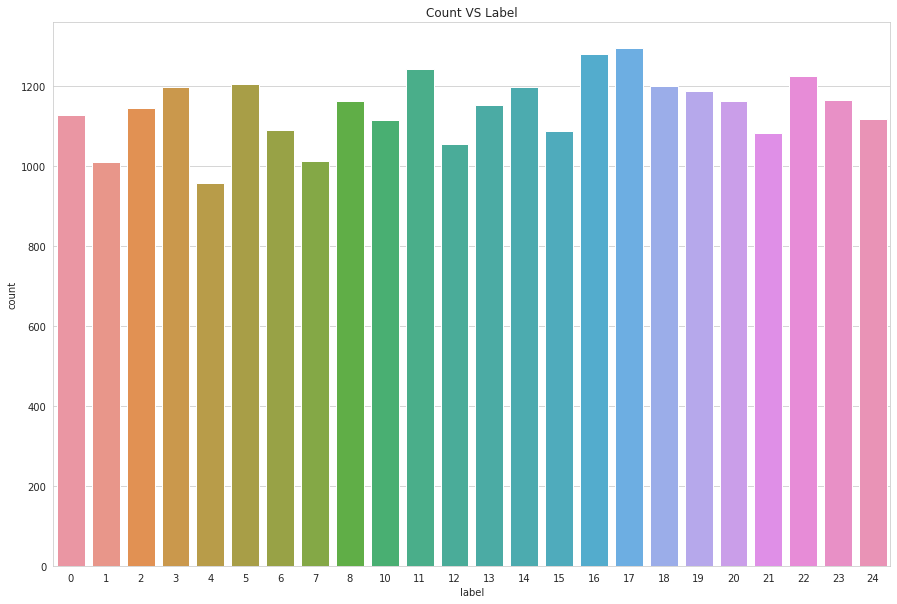

In [59]:
plt.figure(figsize = (15,10)) # Label Count
sns.set_style("whitegrid")

sns.countplot(train_df['label']).set_title('Count VS Label')

The training dataset seems to be balanced.

## Seperating Independent and dependent Variables

In [60]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [61]:
# before encoding
y_train

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

## Using One-Hot Encoder to encode Labels

In [62]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [63]:
# after encoding
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [64]:
x_train = train_df.values
x_test = test_df.values

In [65]:
x_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

## Display input image before Normalization and Resizing

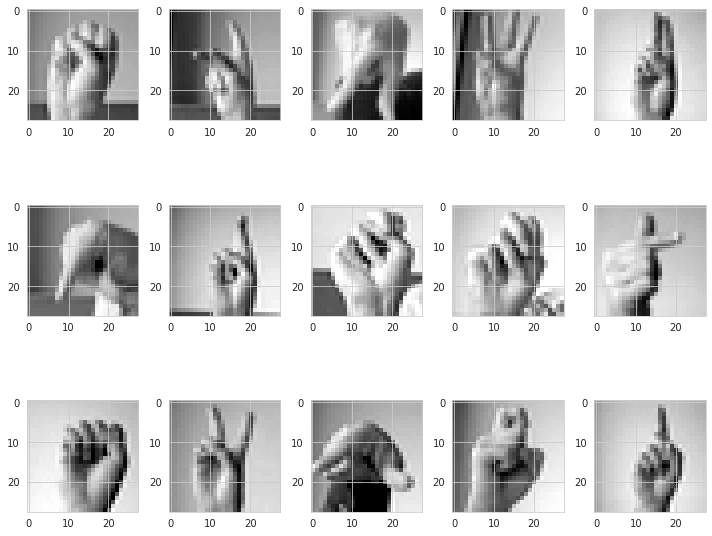

In [66]:
row, col = 3, 5
f, ax = plt.subplots(row, col) 
f.set_size_inches(10, 10)
k = 10
for i in range(row):
    for j in range(col):
        ax[i,j].imshow(x_train[k].reshape(28, 28), cmap = "gray")
        k += 1
    plt.tight_layout()  

### Data Normalization

Normalize data could significantly increase the performance of neuron network when calculating gradients during back propergation. Since all pixel values are in the range between 0-255 (RGB values are between 0-255), divide the data points by 255 could change each pixel value to range 0-1.

In [67]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [68]:
x_train

array([[0.41960784, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607843,
        0.79215686],
       [0.60784314, 0.61568627, 0.61176471, ..., 0.40392157, 0.52941176,
        0.58431373],
       [0.73333333, 0.7372549 , 0.7372549 , ..., 0.76470588, 0.76078431,
        0.76470588],
       ...,
       [0.68235294, 0.68235294, 0.68235294, ..., 0.79215686, 0.78431373,
        0.78431373],
       [0.69411765, 0.70980392, 0.72156863, ..., 0.25098039, 0.34117647,
        0.36470588],
       [0.70196078, 0.70588235, 0.70588235, ..., 0.80392157, 0.81960784,
        0.84313725]])

### Reshape Data into 3-D

Since we are going to use Convolutional Neuron Network (CNN), which is a very powerful neuron network that design to process image data. We need to change the input shape to normal image data format which is (batch size, width, height, channel)

In [69]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [70]:
# after reshaping
x_train.shape

(27455, 28, 28, 1)

## Display input image after normalization and resizing

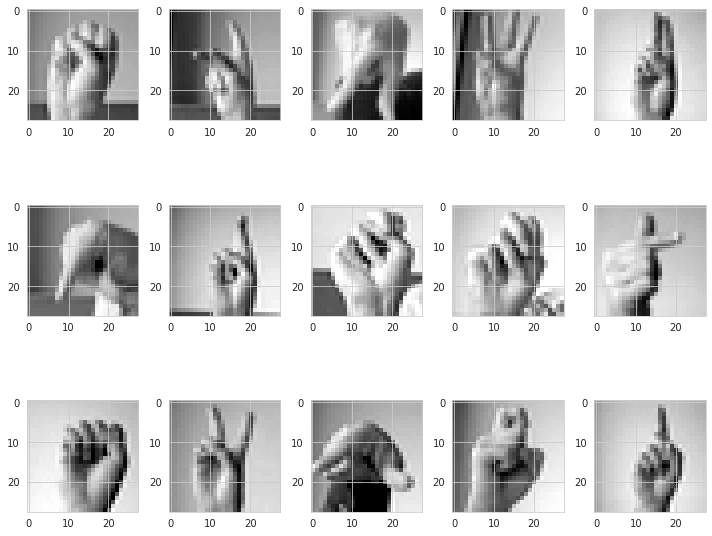

In [71]:
row, col = 3, 5
f, ax = plt.subplots(row, col) 
f.set_size_inches(10, 10)
k = 10
for i in range(row):
    for j in range(col):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()  

All features have been capture and reserved after data processing. Only the scale of the pixels get shrunked.

## Split Training Data into Training and Validation

All the data points are precious, it is always a good idea to split training data into training and validation so that we have more untouched data points for validations.

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

## Image data Augmentation

Although our dataset seem to be balance, inorder to train our model to become more accurate and robust it is always a good idea to do data augmentation. Since the hand angle is important in ASL, I choose to only rotate the input image in a small degree. Because the size of hand does not matter too much I also decide to zoom in and out the image in a small range. The hand position could also be shifted in a small range. The key point for data augmentation is to protect the main feature of the input image in the meantime generate more valuable training data.

In [74]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [75]:
x_train

array([[[[0.45098039],
         [0.4745098 ],
         [0.49803922],
         ...,
         [0.56470588],
         [0.55686275],
         [0.55294118]],

        [[0.45098039],
         [0.4745098 ],
         [0.50196078],
         ...,
         [0.56862745],
         [0.56470588],
         [0.56078431]],

        [[0.45882353],
         [0.48627451],
         [0.50980392],
         ...,
         [0.57254902],
         [0.56862745],
         [0.56862745]],

        ...,

        [[0.34117647],
         [0.3372549 ],
         [0.32941176],
         ...,
         [0.69803922],
         [0.60784314],
         [0.53333333]],

        [[0.34117647],
         [0.34509804],
         [0.34117647],
         ...,
         [0.67843137],
         [0.64313725],
         [0.53333333]],

        [[0.34117647],
         [0.34117647],
         [0.34117647],
         ...,
         [0.5372549 ],
         [0.63921569],
         [0.64313725]]],


       [[[0.62352941],
         [0.62352941],
         [0.62

In [76]:
len(x_train)

18394

## Hyperparameters

In [46]:
# all the parameters could be changed as your wish
monitor = 'val_accuracy' # since our data is balanced, using accuracy is a greate measurement
patience = 2
verbose = 1
factor = 0.5
min_lr = 0.0001

### Prevent High Learning Rate Unconverge issue

In order to avoid unconverge stage during training, using reduce learning rate helper function is a great approach. This will initalize the learning rate to a relatively high value and reduce it is unconverge happen.

In [47]:
learning_rate_reduction = ReduceLROnPlateau(monitor=monitor, patience = patience, verbose=verbose,factor=factor, min_lr=min_lr)

## Construct CNN model Using Keras

Keras is an extension of Tensorflow framework, which abstract many tedious Tensorflow process in a user friendly manner. Significantly increase the speed of building a neural network, at the expense of a litte customization ability of the Tensorflow.

## Convolutional Neural Network (CNN)

Compare to vanila version Multi-layer Perceptron, CNN apply a special type of layer called convolutional layer which is essentially a 2D filter matrix that will be performing matrix multiplication operation to the 2D image input. The 2D filter will slides through the entire image from top-left to bottom-right and extract the information from the input. The input image will be disassembled during the convolutional process and finally process as a whole during the finally dense layers (Fully-connected). Information are from <a href="https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac">Dr. Matthew Stewart's Blog Post</a>

<div style="text-align:center"><img src="https://miro.medium.com/max/700/1*1Cw9nKcdKV5YQun-e4F8gQ.png" /></div>
<div style="text-align:center">MLP VS CNN</div>

<div style="text-align:center"><img src="https://miro.medium.com/max/700/1*RmglbLeNDWSHbdrtrysfbw.png" /></div>
<div style="text-align:center">Examples of filter (kernal) of CNN</div>

<div style="text-align:center"><img src="https://miro.medium.com/max/700/1*LTRcAyl6zuuJvpU-5KECZA.png" /></div>
<div style="text-align:center">Examples of CNN layer structure</div>

## Construct CNN Model

Most of the high accuracy modern CNN structure's contain 3 convolutional layers and using RELU as activation function. Between each convolutional layer, a max pooling layer is applied to shrunk the size of the inputs come from convolutional layer. Dropout layer can add some randomness to the training process so that the trained model could be more robust and perform better on future coming data. In the end, there should always be at least 2 fully connected layers to conclude the result of each training epoch. 

It is always a good idea to start with someone else's well desigend neural network structures that solve the similar problems. This model structure was inspired by <a href="https://www.kaggle.com/madz2000/cnn-using-keras-100-accuracy/notebook#Training-The-Model"> Mr.Madz's Post</a>.

In [91]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 50)         

## Hyperparameters for training

In [92]:
batch_size = 100
num_epoch = 20

In [93]:
result = model.fit(datagen.flow(x_train,y_train, batch_size = batch_size) , \
                    epochs = num_epoch , validation_data = (x_valid, y_valid) , callbacks = [learning_rate_reduction])

Epoch 1/20
184/184 [==============================] - 6s 35ms/step - loss: 1.9911 - accuracy: 0.3953 - val_loss: 4.5188 - val_accuracy: 0.0377
Epoch 2/20
184/184 [==============================] - 6s 33ms/step - loss: 0.7852 - accuracy: 0.7354 - val_loss: 3.6530 - val_accuracy: 0.1436
Epoch 3/20
184/184 [==============================] - 6s 33ms/step - loss: 0.4668 - accuracy: 0.8426 - val_loss: 0.5163 - val_accuracy: 0.8144
Epoch 4/20
184/184 [==============================] - 6s 33ms/step - loss: 0.3117 - accuracy: 0.8945 - val_loss: 0.1277 - val_accuracy: 0.9610
Epoch 5/20
184/184 [==============================] - 6s 33ms/step - loss: 0.2313 - accuracy: 0.9206 - val_loss: 0.1088 - val_accuracy: 0.9697
Epoch 6/20
184/184 [==============================] - 6s 33ms/step - loss: 0.1856 - accuracy: 0.9370 - val_loss: 0.0769 - val_accuracy: 0.9736
Epoch 7/20
184/184 [==============================] - 6s 33ms/step - loss: 0.1621 - accuracy: 0.9443 - val_loss: 0.0547 - val_accuracy: 0.9837

In [86]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 1s 3ms/step - loss: 0.0035 - accuracy: 0.9993
Accuracy of the model is -  99.9302864074707 %


## Visualize Accuracy and Loss

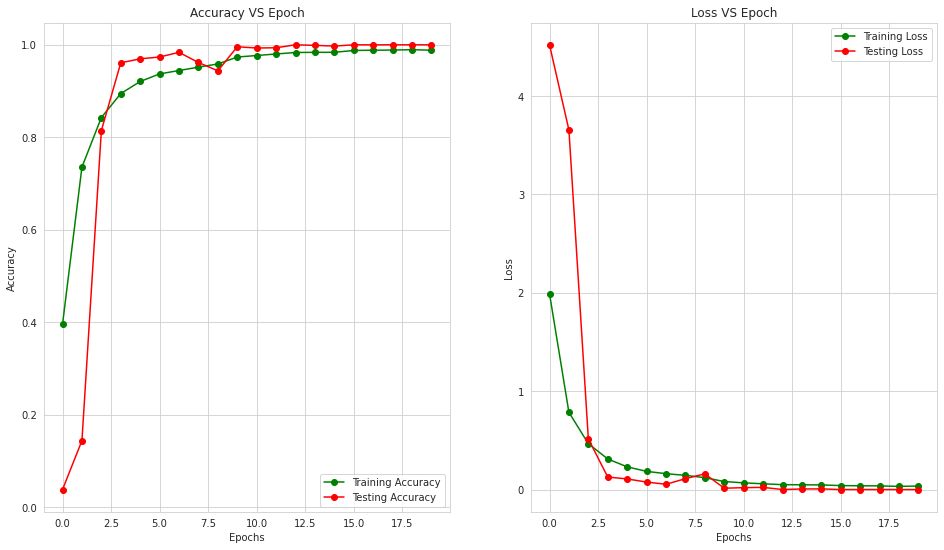

In [94]:
epochs = [i for i in range(num_epoch)]
fig , ax = plt.subplots(1,2)
train_acc = result.history['accuracy']
train_loss = result.history['loss']
val_acc = result.history['val_accuracy']
val_loss = result.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Accuracy VS Epoch')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Loss VS Epoch')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

Accuracy is 0.9998 which is almost perfect, as well as the loss approaching to 0.

## Check the result

In [96]:
predictions = np.argmax(model.predict(x_test), axis=-1)
predictions[:5]  


array([6, 5, 9, 0, 3])

In [97]:
y = y_test.argmax(axis=1)

In [98]:
y.shape

(7172,)

In [99]:
predictions.shape

(7172,)

In [100]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      0.96      0.98       245
     Class 4       0.98      1.00      0.99       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      1.00      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      1.00      1.00       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       1.00      1.00      1.00       144
    Class 18       1.00    

Only label 4 (letter E) is not 100% correct.

In [103]:
correct = np.nonzero(predictions == y)[0]

## Visualize Result

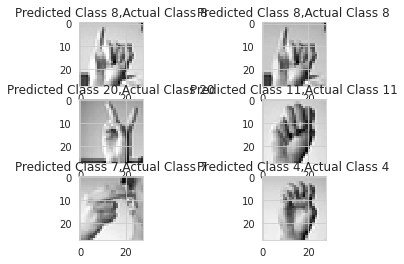

In [105]:
i = 0
for c in correct[10:16]:
    plt.subplot(3,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y[c]))
#     plt.tight_layout()
    i += 1